# Ajuste de Oultiers
El presente notebook presenta un algoritmo para suavizar outliers en series temporales de variables atmósfericas. Se trabaja con los valores obtenidos por una red inalámbrica de sensores desplegada en un cultivo de cacao en una vereda del municipio de San Cayetano, Norte de Santander. Las mediciones analizadas corresponden a las variables atmósfericas Temperatura, Humedad Relativa, Humedad de la Tierra e Intensidad Lumínica.

In [1]:
# Se importan los módulos necesarios
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr

# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

In [2]:
# Importa los datos correspondientes al nodo 2
nodo = 2
#mediciones_cacao = pd.read_csv('medidas_nodo%s'%nodo,parse_dates=True,index_col=0)
#mediciones_cacao = pd.read_csv('mediciones_cacao_n2.csv')
mediciones_cacao = pd.read_csv('nodo2.csv',parse_dates=True,index_col=0)

#mediciones_cacao.loc[:, 'TIME'] = [pd.Timestamp(x) for x in mediciones_cacao['TIME']]
mediciones_cacao.drop('NIVEL UV',axis=1,inplace=True)
mediciones_cacao = mediciones_cacao.copy()
# Crea dos copias de los datos, filtrado para realzar un filtro de valores atípicos
# según el rango de medición y ajustado para suavizar la curva 
filtrado = mediciones_cacao.copy()
ajustado = mediciones_cacao.copy()

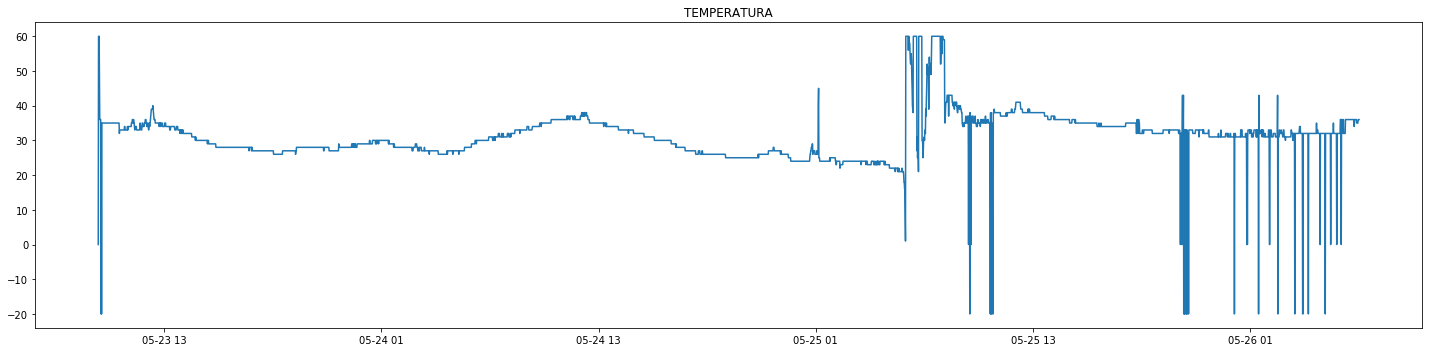

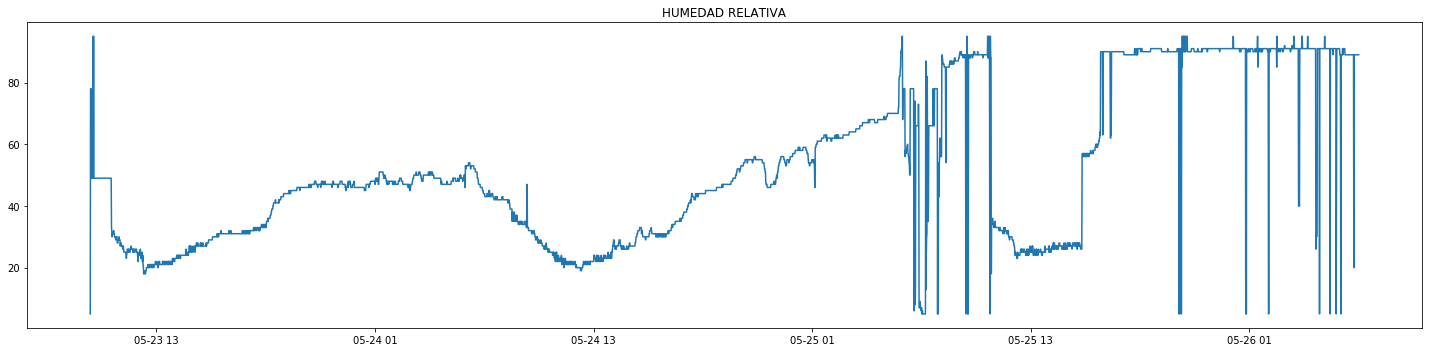

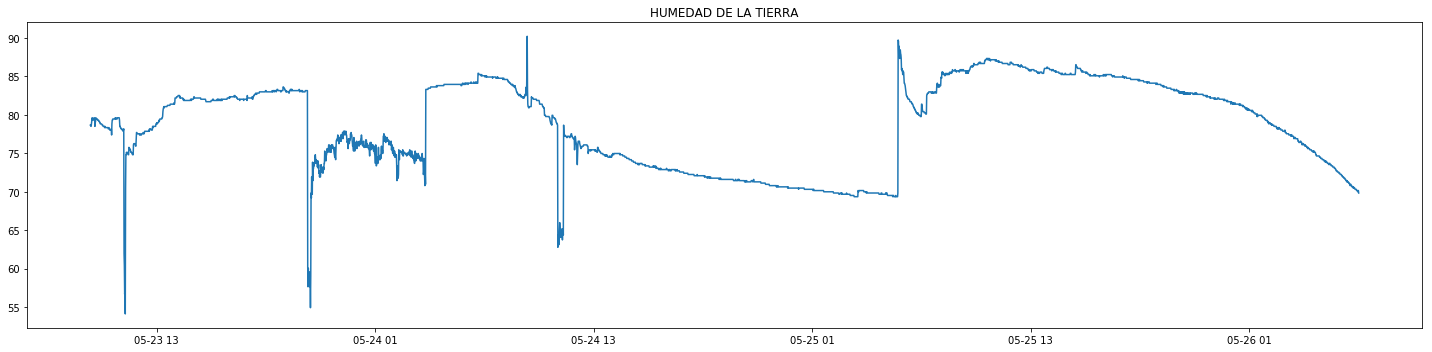

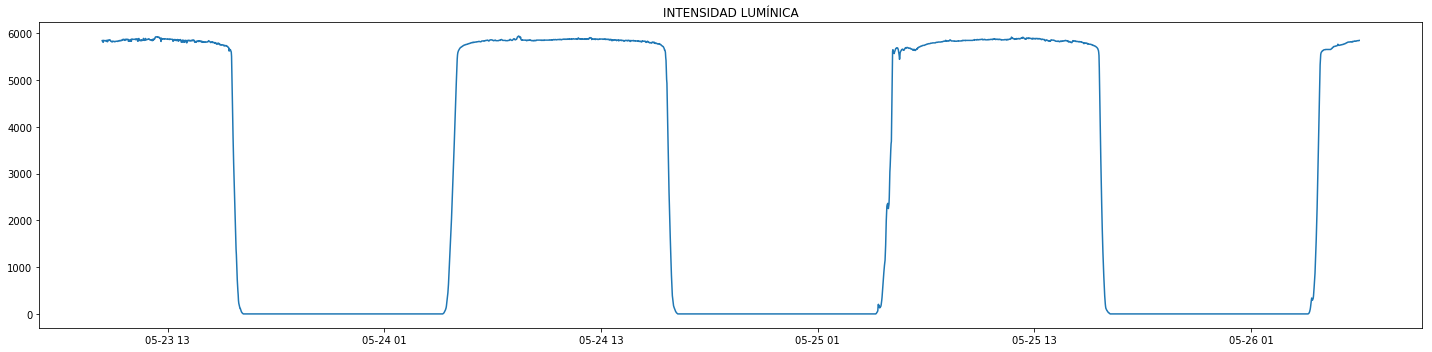

In [3]:
# Grafica las variables  de interes
a=510
for i in range(0,4):
    a+=1
    #plt.subplot(a)
    plt.figure(figsize=[20,5])
    plt.plot(mediciones_cacao.iloc[:,i])
    plt.title(mediciones_cacao.columns[i])
    plt.tight_layout()


A partir de los gráficos de los valores medidos es posible deducir relaciones existentes entre las variables:
- Relación de proporcionaliad inversa entre la temperatura y la humedad relativa.
- Correlación positiva entre la humedad relativa y la humedad del suelo.
- Correspodencia de los valores máximos de intensidad lumínica con los ciclos positivos de temperatura.

Correlaciones positivas
- Temperatura - Intensidad Lumínica.
- Humedad Relativa - Humedad de la Tierra.

Correlaciones negativas
- Temperatura - Humedad Relativa
- Temperatura - Humedad de la Tierra.
- Humedad Relativa - Intensidad Lumínica.

A continuación se realiza un grafico de matriz de correlación para visualizar mejor la relación entre las varibles.

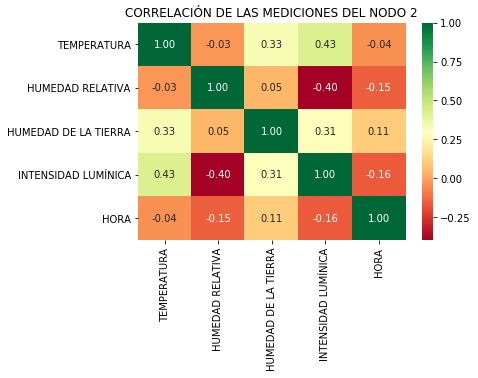

In [4]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.show()

15.0
53


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.082420,0.465196,0.519564,0.028006
HUMEDAD RELATIVA,-0.082420,1.000000,0.049203,-0.398755,-0.151417
HUMEDAD DE LA TIERRA,0.465196,0.049203,1.000000,0.310383,0.108463
INTENSIDAD LUMÍNICA,0.519564,-0.398755,0.310383,1.000000,-0.161948
HORA,0.028006,-0.151417,0.108463,-0.161948,1.000000


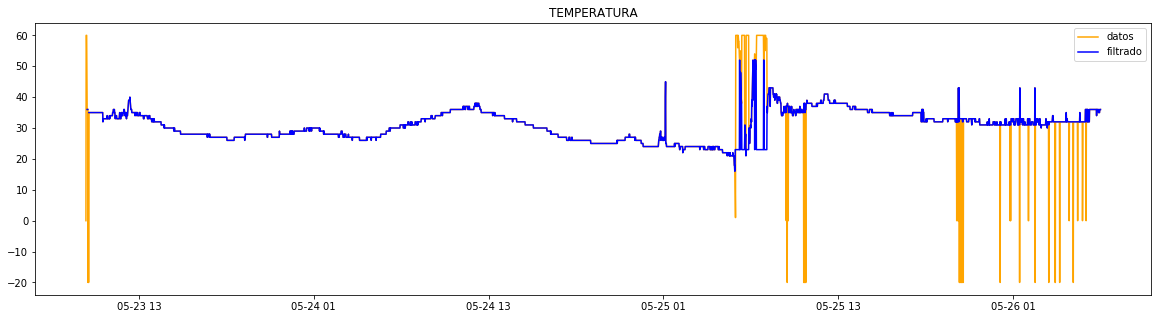

In [5]:
funs.mediciones_cacao= mediciones_cacao
funs.filtrado = mediciones_cacao.copy()
funs.filtrar = mediciones_cacao.copy()
funs.ajustado = mediciones_cacao.copy()
lim_menor0 = funs.filtro_menor(0,1,16,55,0)
print(lim_menor0)
lim_mayor0 = funs.filtro_mayor(0,1,16,55,0)
print(lim_mayor0)

funs.info_var(0)
funs.filtrar_variables(0,lim_menor0,lim_mayor0)

9
100


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.056177,0.465196,0.519564,0.028006
HUMEDAD RELATIVA,-0.056177,1.000000,0.059360,-0.384282,-0.172607
HUMEDAD DE LA TIERRA,0.465196,0.059360,1.000000,0.310383,0.108463
INTENSIDAD LUMÍNICA,0.519564,-0.384282,0.310383,1.000000,-0.161948
HORA,0.028006,-0.172607,0.108463,-0.161948,1.000000


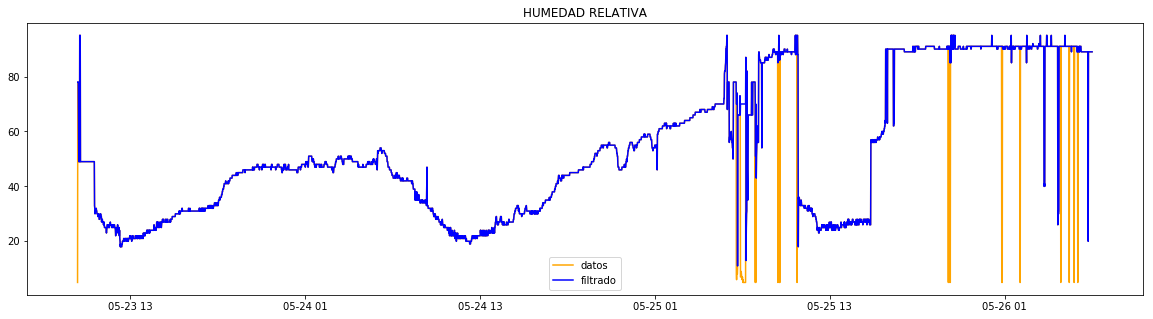

In [6]:
lim_menor1 = funs.filtro_menor(1,0,10,100,0)
print(lim_menor1)

lim_mayor1 = funs.filtro_mayor(1,0,10,100,0)
print(lim_mayor1)

funs.info_var(1)
funs.filtrar_variables(1,lim_menor1,lim_mayor1)

9
100


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.056177,0.465196,0.519564,0.028006
HUMEDAD RELATIVA,-0.056177,1.000000,0.059360,-0.384282,-0.172607
HUMEDAD DE LA TIERRA,0.465196,0.059360,1.000000,0.310383,0.108463
INTENSIDAD LUMÍNICA,0.519564,-0.384282,0.310383,1.000000,-0.161948
HORA,0.028006,-0.172607,0.108463,-0.161948,1.000000


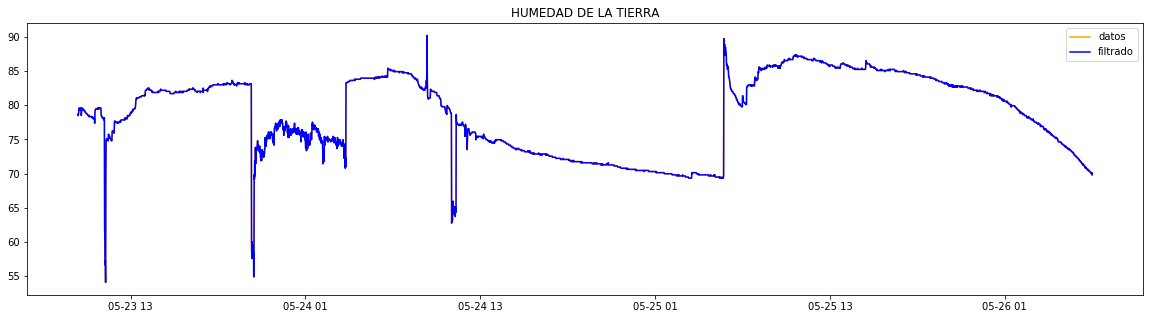

In [7]:
lim_menor2 = funs.filtro_menor(2,1,0,100,1)
print(lim_menor1)
funs.filtro_var(0,lim_menor0,lim_mayor0)
lim_mayor2 = funs.filtro_mayor(2,1,0,100,1)
print(lim_mayor1)

funs.info_var(2)
funs.filtrar_variables(2,lim_menor2,lim_mayor2)

Temperatura 0
HR 1
HS 2
IL 3
H 4
correlación--->(X,X)

lim_menor3 = funs.filtro_menor(3,0,0,100,1)
print(lim_menor1)
funs.filtro_var(0,lim_menor0,lim_mayor0)
lim_mayor3 = funs.filtro_mayor(3,0,0,100,1)
print(lim_mayor1)

funs.filtro_var(3,lim_menor3,lim_mayor3)

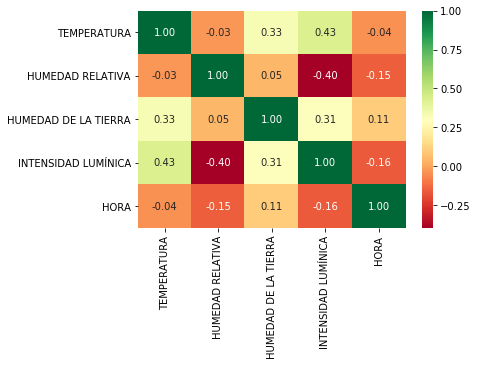

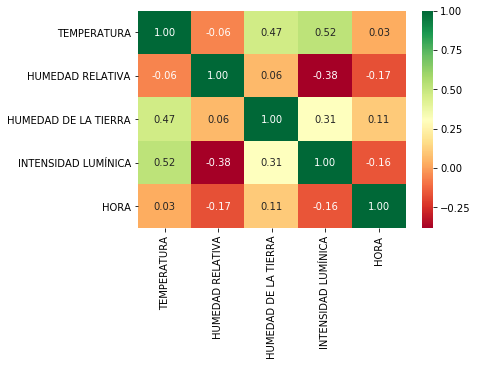

In [8]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(funs.filtrar.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

In [9]:
a={'corre':[3,5,2,2,1]}
a=pd.DataFrame(a)
a.index[a['corre'] == a.corre.min()].tolist()[0]
#pd.DataFrame(d)
#d[0]

4

El sensor DHT11 tiene rangos de medición de:  
- Temperatura de $(20°C - 50°C)\pm5°C$  
- Humedad Ralativa de $(20\% - 90\%)\pm2\%$

L arelación entre la temperatura y la humedad relativa es de una correlación negativa


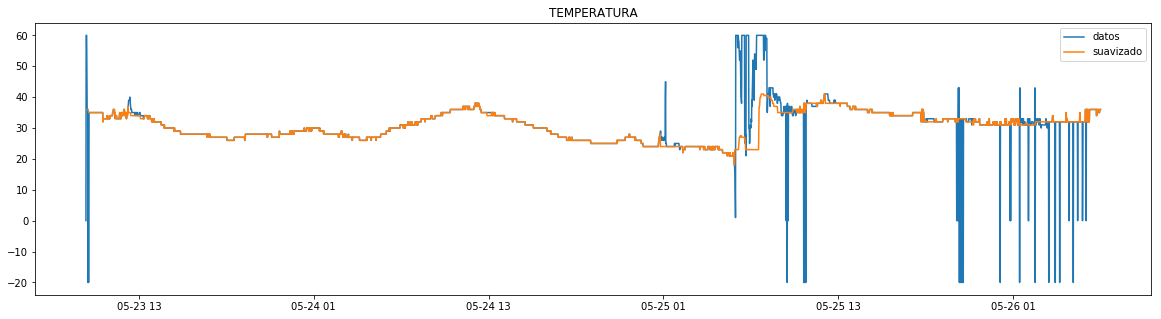

In [10]:
funs.ajuste_variacion(0)

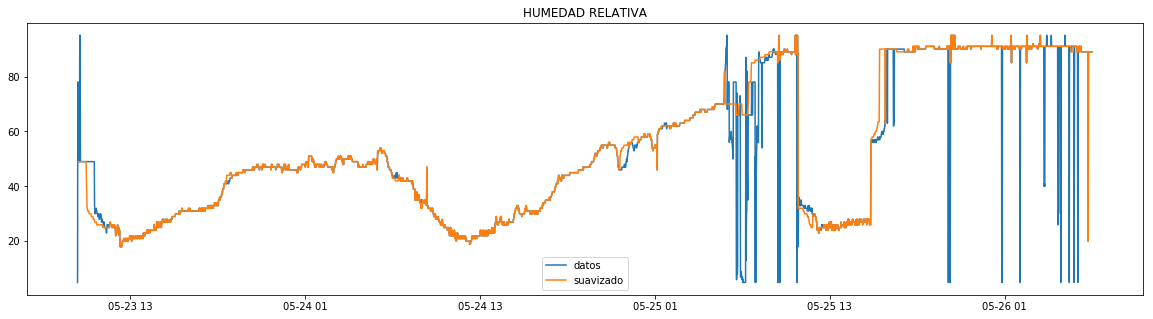

In [11]:
funs.ajuste_variacion(1)

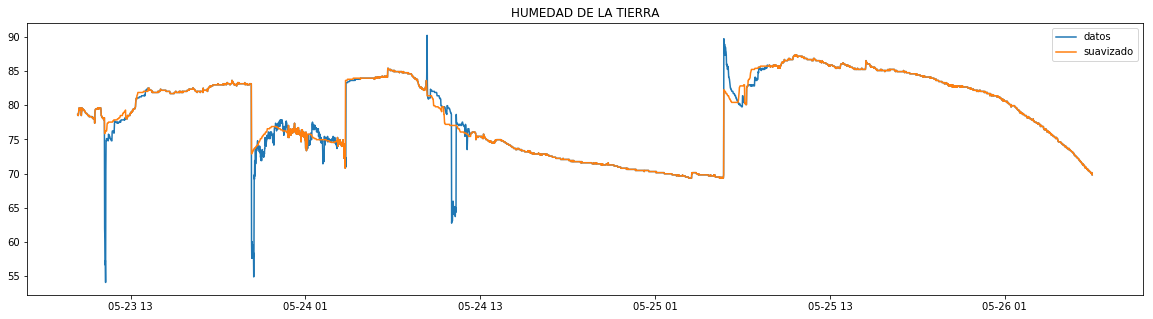

In [12]:
funs.ajuste_variacion(2)

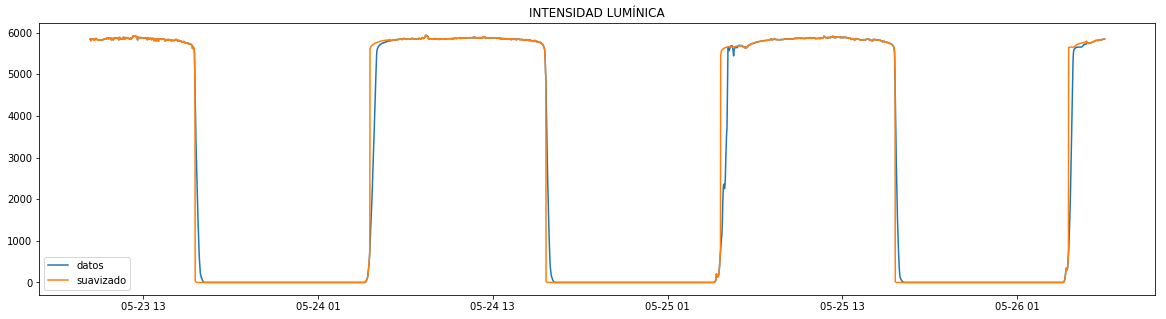

In [13]:
funs.ajuste_variacion(3)

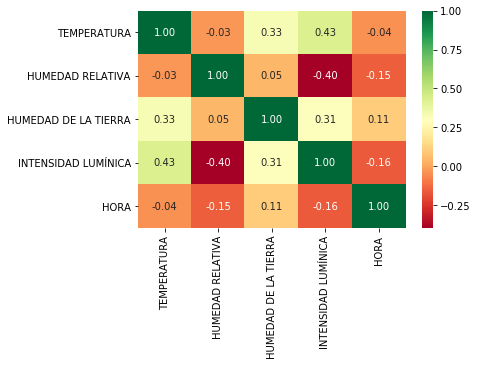

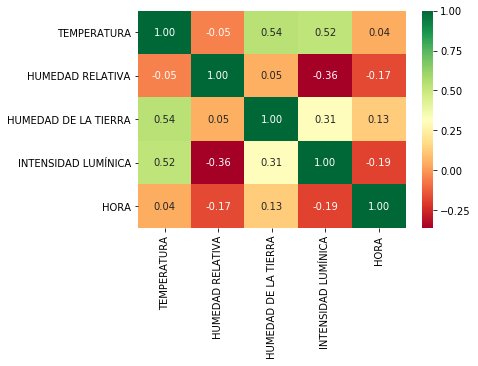

In [14]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(funs.ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

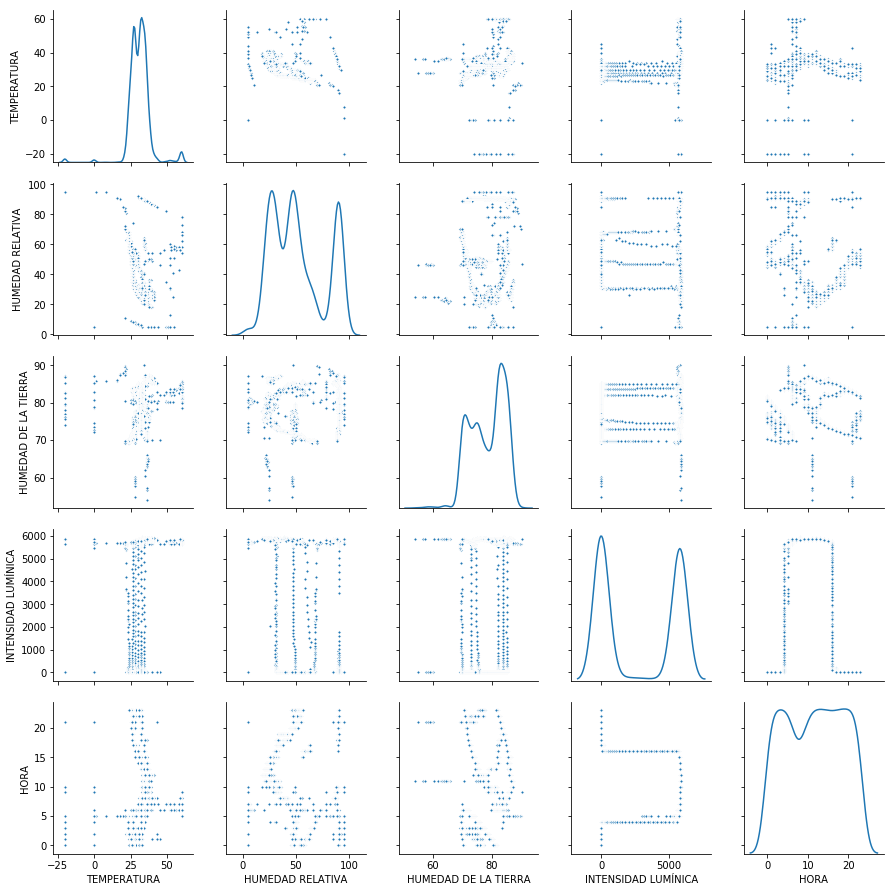

In [15]:
sns.pairplot(mediciones_cacao,plot_kws=dict(s=10),diag_kind=('kde'))
plt.show()

C:\Users\Jergb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Jergb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


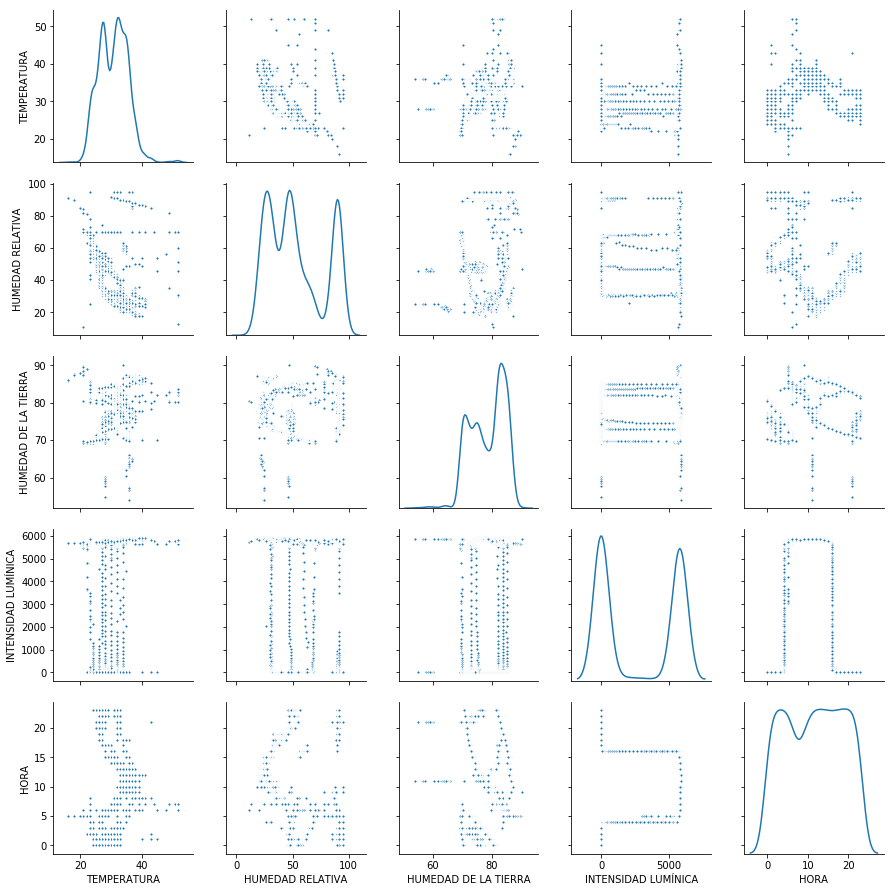

In [16]:
sns.pairplot(funs.filtrar,plot_kws=dict(s=10),diag_kind=('kde'))
plt.show()

C:\Users\Jergb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Jergb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


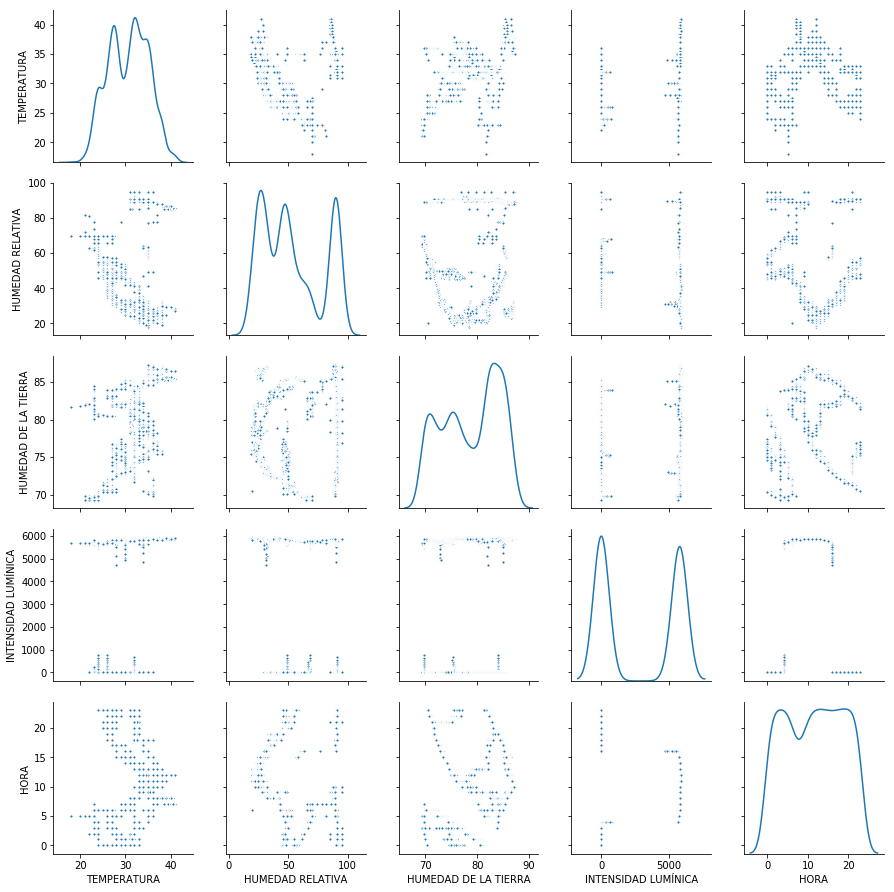

In [17]:
sns.pairplot(funs.ajustado,plot_kws=dict(s=10),diag_kind=('kde'))
plt.show()

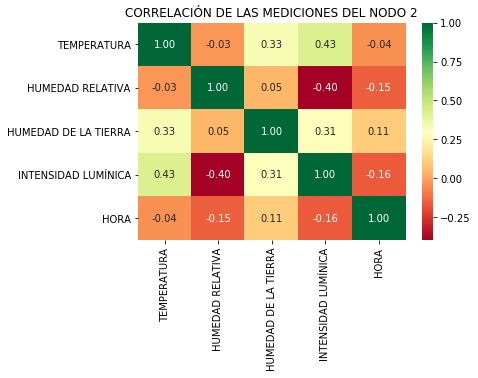

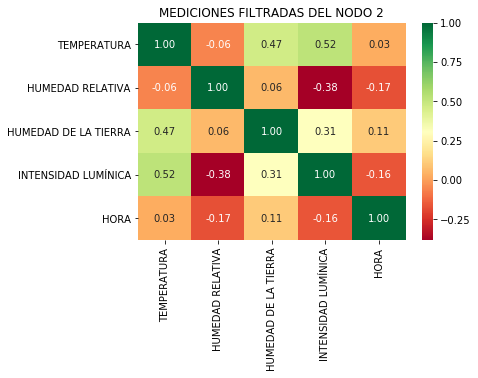

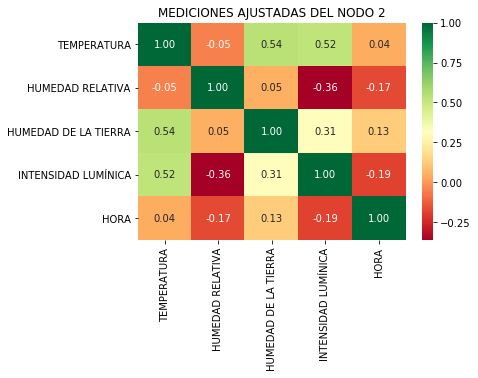

In [18]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.filtrar.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES FILTRADAS DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES AJUSTADAS DEL NODO %s' %nodo)
plt.show()

In [19]:
mediciones_cacao = pd.read_csv('medidas.csv')
mediciones_cacao.index = mediciones_cacao.TIME
mediciones_cacao.drop(columns = 'TIME',inplace = True)

In [20]:
mediciones_cacao

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA
TIME,,,,,,,
2018-05-09 09:38:00,1,2,27,19,74.97,0,5853
2018-05-09 09:49:00,2,2,28,19,72.72,0,5865
2018-05-09 09:50:00,3,2,28,19,72.56,0,5859
2018-05-09 09:51:00,4,2,28,19,72.40,0,5859
2018-05-09 09:52:00,5,2,28,19,72.08,0,5859
...,...,...,...,...,...,...,...
2018-06-11 06:15:00,22809,5,33,29,6.43,1,5865
2018-06-11 06:16:00,22810,2,31,17,0.82,0,5853
2018-06-11 06:16:00,22811,5,33,29,6.43,0,5865


In [21]:
df = mediciones_cacao.copy()

In [22]:
from sklearn.preprocessing import StandardScaler
df2 = StandardScaler().fit_transform(df.iloc[:,2:7])
df2 = pd.DataFrame(df2)
df2.columns = df.iloc[:,2:7].columns
df2.index = df.index
df.iloc[:,2:7] = df2
df

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA
TIME,,,,,,,
2018-05-09 09:38:00,1,2,-0.098058,-1.155257,1.472835,-0.102326,0.970130
2018-05-09 09:49:00,2,2,0.105157,-1.155257,1.395028,-0.102326,0.974402
2018-05-09 09:50:00,3,2,0.105157,-1.155257,1.389495,-0.102326,0.972266
2018-05-09 09:51:00,4,2,0.105157,-1.155257,1.383962,-0.102326,0.972266
2018-05-09 09:52:00,5,2,0.105157,-1.155257,1.372897,-0.102326,0.972266
...,...,...,...,...,...,...,...
2018-06-11 06:15:00,22809,5,1.121234,-0.721375,-0.897334,4.149720,0.974402
2018-06-11 06:16:00,22810,2,0.714803,-1.242033,-1.091332,-0.102326,0.970130
2018-06-11 06:16:00,22811,5,1.121234,-0.721375,-0.897334,-0.102326,0.974402
